# Pymaceuticals Inc.
---

### Analysis

- My analysis for this challenge shows the data of the mouse data study with 249 Mice identitifed with SCC tumors and received treament with a range of drug regimens. Over span of 45 days they tracked the changes and development and measured the results. We are comparing the correlation of Pymaceuticals' drugs of interest, Capomulin againts other treaments. One of main results show that the heavier the weight of a mouse the larger the tumor volumn was shown over time and Capomulin showed lower tumor volumne results per mouse count compared to other drug regimens. 
 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how= "outer")
merged_data = pd.merge(mouse_metadata, study_results, how="outer")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
# Checking the number of mice.
num_mice= merged_data["Mouse ID"].nunique()
num_mice

249

In [61]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find duplicate mice based on Mouse ID and Timepoint
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),"Mouse ID"].unique()
print(f"Duplicate mice:{duplicate_mice}")


Duplicate mice:['g989']


In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_data.loc[merged_data["Mouse ID"].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data.df= pd.DataFrame({combined_data})
#clean_data_df_drop_duplicates(subset=['Mouse ID','Timepoint'],keep='last')
    
clean_data=merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [64]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
print(f"Number of mice in clean DataFrame: {num_mice_clean}")

Number of mice in clean DataFrame: 249


## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats = summary_stats.rename(columns={"mean": "Mean", "median": "Median", "var": "Variance", "std": "Standard Deviation", "sem": "SEM"})
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).rename(columns={"mean": "Mean", "median": "Median", "var": "Variance", "std": "Standard Deviation", "sem": "SEM"})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

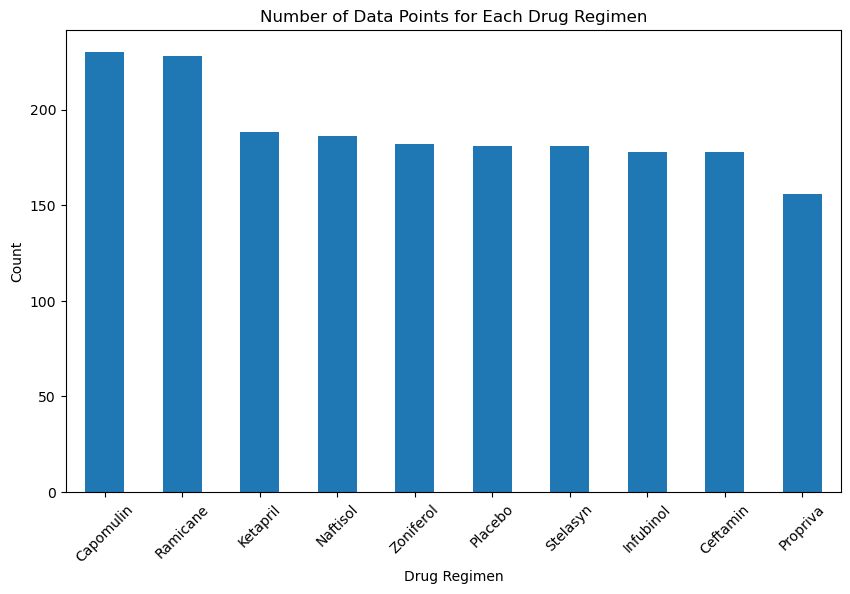

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar", figsize=(10, 6), rot=45)
plt.title("Number of Data Points for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()

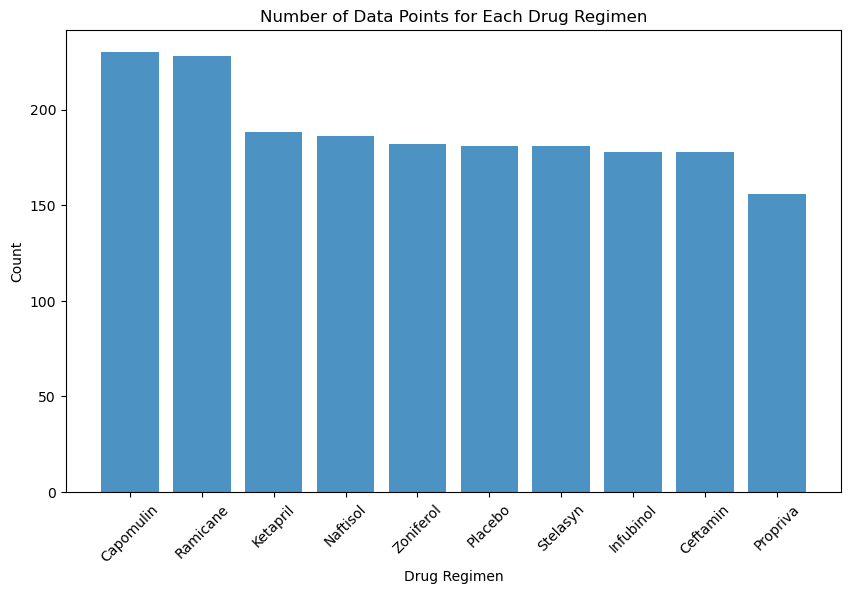

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, align="center", alpha=0.8)
plt.xticks(rotation=45)
plt.title("Number of Data Points for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()

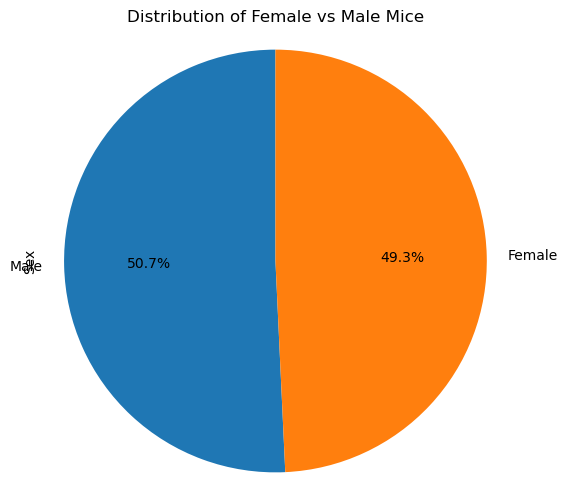

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, figsize=(6, 6))
plt.title("Distribution of Female vs Male Mice")
plt.axis("equal")
plt.show()

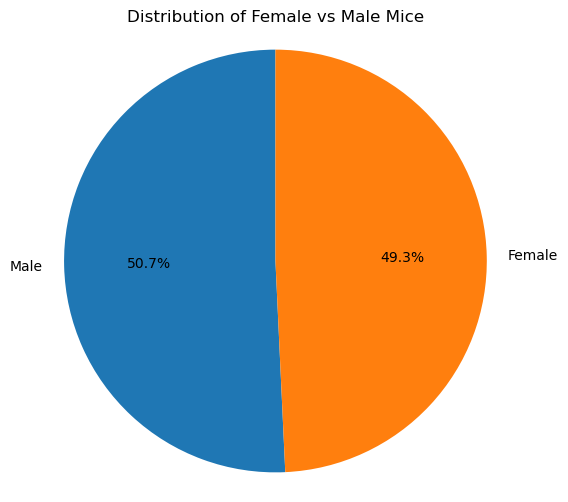

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs Male Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = clean_data.loc[clean_data["Drug Regimen"].isin(treatment_regimens)].groupby("Mouse ID")["Timepoint"].max()
final_tumor_volume = pd.merge(final_tumor_volume, clean_data, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_volume.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543


In [72]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset 
    # Determine outliers using upper and lower bounds
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data= []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = clean_data.loc[clean_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add subset
    tumor_vol_data.append(treatment_data)   

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
  
    # Print the treatment and any potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


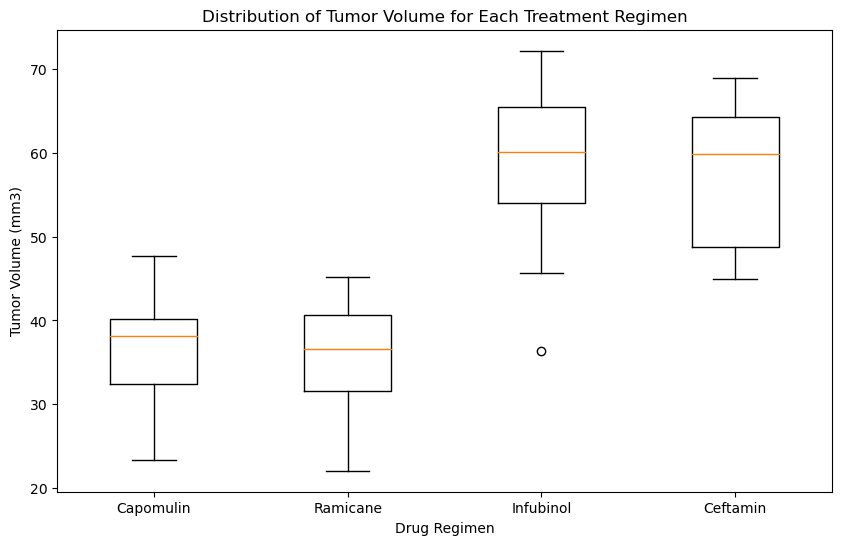

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == regimen, "Tumor Volume (mm3)"] for regimen in treatment_regimens]
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=treatment_regimens)
plt.title("Distribution of Tumor Volume for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

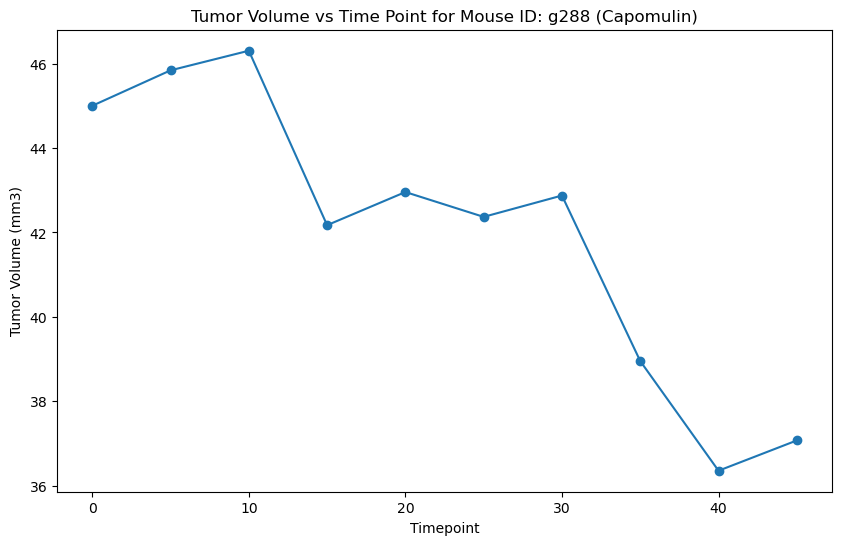

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
selected_mouse = capomulin_data["Mouse ID"].sample().values[0]
selected_mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == selected_mouse]
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker="o")
plt.title(f"Tumor Volume vs Time Point for Mouse ID: {selected_mouse} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

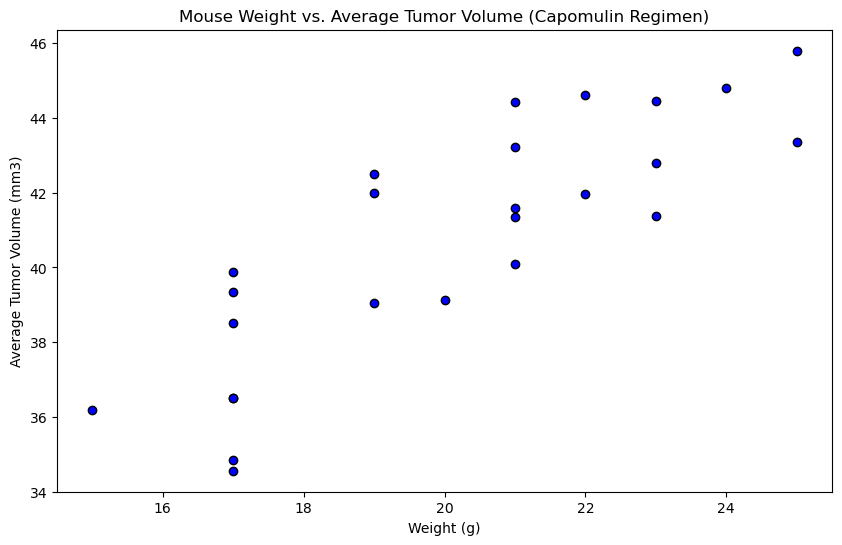

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Find average tumor volume for each mouse

# Merge average tumor volume onto data_df and drop duplicates

# Create a scatter plot based on new dataframe above with circle markers and listed colors

# Add labels and title to plot

capomulin_avg_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge average tumor volume onto clean_data and drop duplicates
capomulin_merged = pd.merge(capomulin_data, capomulin_avg_volume, on="Mouse ID")
capomulin_merged = capomulin_merged.drop_duplicates(subset="Mouse ID")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_merged["Weight (g)"], capomulin_merged["Tumor Volume (mm3)_y"], color="b", edgecolor="black")

# Add labels and title to the plot
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


## Correlation and Regression

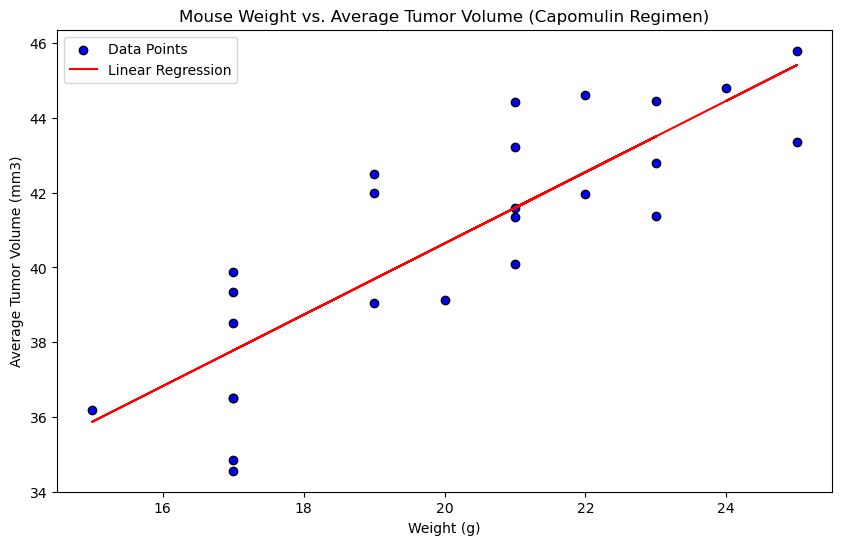

In [76]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


plt.figure(figsize=(10, 6))
plt.scatter(capomulin_merged["Weight (g)"], capomulin_merged["Tumor Volume (mm3)_y"], color="b", edgecolor="black", label="Data Points")
plt.plot(capomulin_merged["Weight (g)"], slope * capomulin_merged["Weight (g)"] + intercept, color="r", label="Linear Regression")

# Add labels and title to the plot
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Add legend
plt.legend()

# Show the plot
plt.show()

